# MelV LDB location

### Import modules

In [1]:
%pylab inline
import os, h5py
import utils.mbtools as mbt
import utils.mbplot as mbp

/Users/hantke/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


### Load coordinates from file

- *v*: Corrdinates of vertices [A]
- *d*: Corrdinate of DOT [A]

Convention for order or coordinates: [x, y, z]

In [2]:
i = 2
cmm_dir = "./cmm"
filenames = [("%s/%s" % (cmm_dir,f)) for f in os.listdir(cmm_dir) if "ND" not in f]
v,d = mbt.load_points(filenames[i])

### Align virion in two steps

- *c*: 5-fold symmetry axis vector

In [3]:
# 1) Rough alignment
v,d,c = mbt.rough_align(v,d)
assert abs(c[2]/c[0])>1E12
assert abs(c[2]/c[1])>1E12

# 2) Refinement
v,d = mbt.match_rotation(v,d)
#v,d = match_scaling(v,d)

print "v = ",v
print "d = ",d
print "c = ",c

v =  [[  9.39511784e-03   4.69861430e+00  -1.16684478e+03]
 [  4.16002136e+00   1.04128832e+03  -5.21146171e+02]
 [ -9.88475181e+02   3.21284425e+02  -5.26727419e+02]
 [  9.87662879e+02   3.15583571e+02  -5.21425672e+02]
 [ -6.07035440e+02  -8.43659572e+02  -5.21305917e+02]
 [  6.10189606e+02  -8.46001752e+02  -5.20101513e+02]
 [ -6.10364658e+02   8.49872237e+02   5.19495195e+02]
 [  6.13874935e+02   8.42914430e+02   5.23762442e+02]
 [ -9.93844025e+02  -3.19283866e+02   5.18776917e+02]
 [  9.91526752e+02  -3.23257070e+02   5.25108314e+02]
 [ -3.20541856e+00  -1.04451323e+03   5.22464947e+02]
 [ -4.49886495e+00   1.07389920e+00   1.16794366e+03]]
d =  [ -15.62659089  166.11844389 -637.66488473]
c =  [  2.82548659e-13   2.94486552e-13  -1.16585424e+03]


### Plot along 3 principal axes

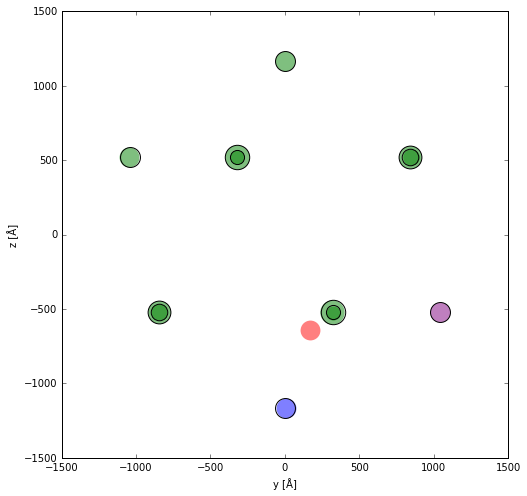

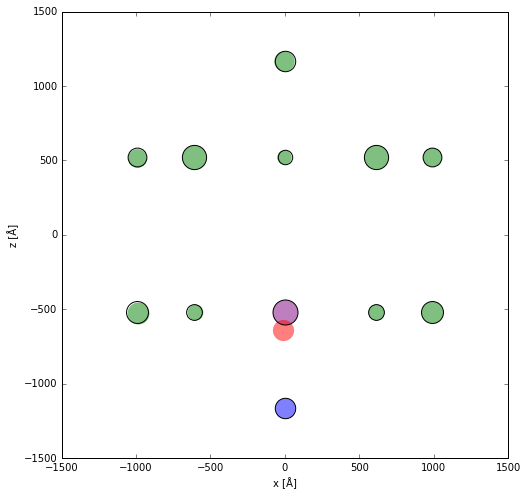

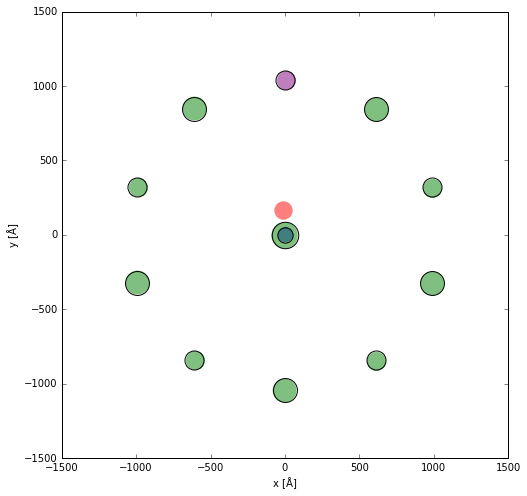

In [4]:
mbp.plot_proj(v,d,0)
mbp.plot_proj(v,d,1)
mbp.plot_proj(v,d,2)

### Run alignment for all particles

In [5]:
# Prepare output
V = zeros(shape=(len(filenames), 12, 3))
D = zeros(shape=(len(filenames), 3))
# Output?
output_projections = False
plotdir = "./plots"
resdir = "./results"

for i,filename in enumerate(filenames):
    v,d = mbt.load_points(filename)
    v,d,c = mbt.rough_align(v,d)
    assert abs(c[2]/c[0])>1E12
    assert abs(c[2]/c[1])>1E12
    v,d = mbt.match_rotation(v,d)
    if output_projections:
        if not os.path.exists(plotdir):
            os.mkdir(plotdir)
        # Write pngs of projections
        filename_x = plotdir + "/px_" + filename[:-4] + ".png"
        mbp.plot_proj(v,d,0,filename=filename_x)
        filename_y = plotdir + "/py_" + filename[:-4] + ".png"
        mbp.plot_proj(v,d,1,filename=filename_y)
        filename_z = plotdir + "/pz_" + filename[:-4] + ".png"
        mbp.plot_proj(v,d,2,filename=filename_z)
    V[i,:,:] = v[:,:]
    D[i,:] = d[:]
    
if output_projections:
    mbp.plot_params(b, alpha, r_u)

# Write to file
if not os.path.exists(resdir):
    os.mkdir(resdir)
with h5py.File("%s/params.h5" % resdir, "w") as f:
    f["V"]     = asarray(V)
    f["D"]     = asarray(D)